<a href="https://colab.research.google.com/github/ilkzeyden/call-center-customer-conversationsclustering-and-classification/blob/main/bert_customer_text(alt_konu_arama_ve_s%C4%B1n%C4%B1fland%C4%B1rma_algoritmalar%C4%B1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kütüphane yükle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


!pip install bertopic

!pip install transformers

!pip install tokenizers

!pip install sentencepiece

!pip install wordcloud

>pip install gensim

In [ ]:
#bertopic kullanmak için
!pip install bertopic
!pip install sentencepiece
from bertopic import BERTopic
from transformers import AutoModel, AutoTokenizer # bert için içeri aktardığımız önceden eğitilmiş embedding modeli kendi modelimizde kullanabilmek için bazı işlemlerden geçirtmek için bu kütüphaneden yararlanılır.
import pandas as pd # veriyi excelden almak ve veriyle önişlemler gerçekleşitrmek için kütüphane
from wordcloud import WordCloud # veride geçen en çok kelimeleri görselleştirmek için kelime bulutu kütüphanesi
import matplotlib.pyplot as plt # grafik oluşturmak için kütüphane
 # konu modellemek için gensim'in bazı modüllerinden yararlanılır.
import gensim.corpora as corpora # veriyi lda modelinde kullanmak için sözlük modülü
from gensim.models.coherencemodel import CoherenceModel # modeli değerlendirmek için modül
import nltk # türkçe stopwords'leri kullanmak için
import re # yazıları daha anlaşılır yapmak için veri değiştirme kütüphanesi
from nltk.tokenize import RegexpTokenizer # Cümleleri makine için daha anlaşılır yapmak için bölmek için modül
from collections import Counter # veride geçen kelimeleri saydırmak için kütüphane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 9.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 M

In [ ]:
import tensorflow as tf
import torch

# veri yükle

In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Klasör yolu - Check this path for typos and ensure the directory exists
folder_path = '/content/drive/My Drive'

# List the contents of 'My Drive' to verify the 'Metin' directory exists
!ls "/content/drive/My Drive"

# Klasörü aç - This line should work if the path is correct and the drive is mounted
os.chdir(folder_path)

# Klasör içeriğini listele
print(os.listdir(folder_path))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 bert2_customer_text.ipynb
 CallToTexNewData1.xlsx
 CallToTexNewData2.xlsx
 CallToTexNewData3.xlsx
 CallToTexNewData.xlsx
'Colab Notebooks'
 df_5_toplam.xlsx
 diversity_metrics.py
'E devlet bilgi'
 facedata
'gensim-lda customer_text(14 konu için sınıflandırma algoritmaları ekli).ipynb'
'gensim-lda tarafından çıkarılan 5 konu lstm sınıflandırma-1.ipynb'
'gensim-lda tarafından çıkarılan 5 konu lstm sınıflandırma deneme en son.ipynb'
'gensim-lda tarafından çıkarılan 5 konu lstm sınıflandırma.ipynb'
'gensim-lda tarafından çıkarılan 5 konu tavlama lstm sınıflandırma.ipynb'
'İLKAY ZEYNEP DENİZ CV.pdf'
'İngilizce '
'Kayıt Detay2.xlsx'
 Metin
 Model1.xlsx
 Model2.xlsx
 Okul
 rbo.py
 resnet_veri
 Sertifika
 Staj
'Tatil '
'ÜCRETSİZ KAYNAK LİNKLERİ.docx'
 Videolar
 word_embeddings_rbo.py
'YKS özetler'
['Kayıt Detay2.xlsx', 'diversity_metrics.py', 'rbo.py', 

In [ ]:
df1 = pd.read_excel('CallToTexNewData.xlsx')
df2 = pd.read_excel('CallToTexNewData1.xlsx')
df3 = pd.read_excel('CallToTexNewData2.xlsx')
df4 = pd.read_excel('CallToTexNewData3.xlsx')
df5 = pd.read_excel('Kayıt Detay2.xlsx')
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# sadece müşteri çağrıları ve ürünlerle çalışağımızdan aşağıdaki veriler verisetinden çıkarılır.
df.drop(columns=['CallId','Kuyruk','AgentText', 'Id','AgentTextTimes','CustomerTextTimes','Type'], inplace=True)
df.drop(df[df['Kuyruk Konusu'] == 'Yeni Ürün Tanıtımı'].index, inplace = True)
df.drop(df[df['Kuyruk Konusu'] == 'Hizmet Takibi Servis Takibi'].index, inplace = True)
df.drop(df[df['Kuyruk Konusu'] == 'Kurumsal Satış'].index, inplace = True)
df.drop(df[df['Kuyruk Konusu'] == 'Kurumsal Satış - Telefon'].index, inplace = True)
df.drop(df[df['Kuyruk Konusu'] == 'İngilizce Çağrılar'].index, inplace = True)
df.drop(df[df['Kuyruk Konusu'] == 'Memnuniyet Araması'].index, inplace = True)
df.drop(df[df['Kuyruk Konusu'] == 'Uzaktan Erişim'].index, inplace = True)
df.drop(df[df['Kuyruk Konusu'] == 'Çözüm Ekibi'].index, inplace = True)
df.drop(columns=['Kuyruk Konusu'], inplace=True)

df


,CustomerText
2,iyi günler ben bu kampanyaya *****ılırım başar...
4,iyi günler günaydın şey ben bugün gün kaldım d...
5,iyi günler efendim ııı cuma günü de yok herhal...
7,iyi günler benim faruk efendim benim klimam dü...
9,eee iyi çalışmalar ceylan hanım kolay gelsin e...
...,...
25995,barış bey barış beydi değil mi hı başka yıllar...
25996,iyi günler ben telefonumun garantide de oraya ...
25997,teşekkür ederim **** bey kolay gelsin hayırlı ...
25998,evet ç**** merkezinden şikayetçiyim bana açıp ...


# veri önişle

In [ ]:
# Müşterilerin söylediklerinde geçen en çok 100 kelime
Counter(" ".join(df["CustomerText"]).split()).most_common(100)

[('*', 213912),
 ('evet', 108559),
 ('tamam', 98276),
 ('ben', 80618),
 ('yani', 70489),
 ('yok', 60291),
 ('şey', 57632),
 ('bu', 56248),
 ('de', 51135),
 ('bir', 50629),
 ('ııı', 49173),
 ('o', 44488),
 ('ya', 42521),
 ('da', 42058),
 ('şimdi', 40874),
 ('var', 40402),
 ('****', 36560),
 ('ama', 35376),
 ('*****', 33400),
 ('mi', 32612),
 ('şu', 31413),
 ('******', 31291),
 ('değil', 30488),
 ('iyi', 30278),
 ('ne', 29562),
 ('eee', 29361),
 ('daha', 24912),
 ('benim', 24827),
 ('teşekkür', 23439),
 ('bana', 23002),
 ('çok', 22253),
 ('zaman', 21867),
 ('hani', 21052),
 ('sağolun', 20872),
 ('günler', 19768),
 ('ederim', 19750),
 ('an', 18622),
 ('için', 18447),
 ('diyor', 17824),
 ('size', 16971),
 ('mı', 16449),
 ('aaa', 15676),
 ('ki', 15427),
 ('yüz', 15177),
 ('hıhı', 14888),
 ('diye', 14781),
 ('işte', 14487),
 ('bunu', 14434),
 ('*u', 14365),
 ('hı', 14230),
 ('hayır', 13994),
 ('tabi', 13621),
 ('anladım', 13612),
 ('beş', 13471),
 ('böyle', 13402),
 ('oldu', 13381),
 ('öyle'

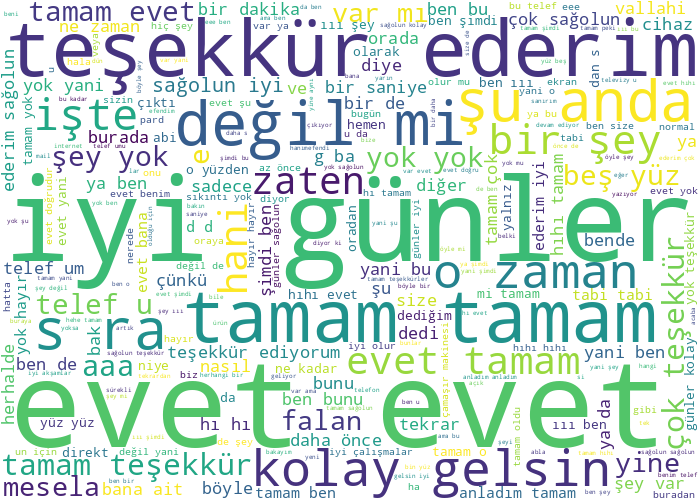

In [ ]:
# kelime bulutu en çok 250 kelime
long_string = ','.join(list(df['CustomerText'].values))
wordcloud = WordCloud(background_color="white", max_words=250, width=700, height=500, contour_width=10, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
# Kelimelerdeki yazım yanlışlarını düzeltme
df['CustomerText'] = df['CustomerText'].str.replace(r'birim[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'birim', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'tablet[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'tablet', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'telefon[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'telefon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'televizyon[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'televizyon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'makine[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'makine', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'şifre[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'şifre', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ekran[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'ekran', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'garanti[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'garanti', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ar\u0131za[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'arıza', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r's\u00fcp\u00fcrge[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'süpürge', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'siz[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'siz', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'do\u011fru[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'doğru', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'gel[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'gel', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'gir[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'gir', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'tamam[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'tamam', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'biz[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'biz', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ben[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'ben', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ses[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'ses', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ayar[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'ayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'uygulama[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'uygulama', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'numara[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'numara', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'bey[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bey', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'bilgisayar[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bilgisayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'buzdola[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'buzdolap', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ankast[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'ankastre', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'davlumbaz[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'davlumbaz', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'f\u0131r\u0131n[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'fırın', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'mikrodalga[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'mikro dalga', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'mikrodalga', 'mikro dalga', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'mikro dalga[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'mikro dalga', regex=True)

df['CustomerText'] = df['CustomerText'].str.replace(r'set \u00fcst\u00fc[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'set üstü', regex=True)

df['CustomerText'] = df['CustomerText'].str.replace(r'bozu[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'arıza', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'buz dola[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'buzdolap', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'buluray[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bluray', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'eniks[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'nx', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'enx[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'nx', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'enix[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'nx', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'klima[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'klima', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'diz\u00fcst\u00fc[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bilgisayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'diz \u00fcst\u00fc[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bilgisayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'laptop[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bilgisayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'notebook[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bilgisayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'faks[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'faks', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'yaz\u0131c\u0131[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'yazıcı', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'taray\u0131c\u0131[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'tarayıcı', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\u00e7amas\u0131r[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'çamaşır', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'kurutma[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'kurutma', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'makina[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'makine', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'telekom[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'telekom', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\u015fikayet[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'şikayet', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'cihaz[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'cihaz', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\bara[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'arama', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'internet[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'internet', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'mesaj[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'mesaj', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btel\b', 'telefon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btelef\b', 'telefon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'mobil[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'mobil', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btel\b', 'telefon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'bula\u015f\u0131k[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bulaşık', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'sistem[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'sistem', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\bpc\b', 'bilgisayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ses sistem', 'ev sinema sistem', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'sinema sistem', 'ev sinema sistem', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\bkayd', 'kayıt', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btv\'[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'tv', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btv\b', 'televizyon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btelevizy\b', 'televizyon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btrol\b', 'kontrol', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'batarya[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'batarya', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'm\*taj', 'montaj', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'montaj[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'montaj', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'm\*it\u00f6r', 'monitör', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'monit\u00f6r[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'monitör', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\u015farj[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'şarj', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'servis[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'servis', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\bkod', 'kod', regex=True)


df

,CustomerText
2,iyi günler ben bu kampanyaya *****ılırım başar...
4,iyi günler günaydın şey ben bugün gün kaldım d...
5,iyi günler efendim ııı cuma günü de yok herhal...
7,iyi günler ben faruk efendim ben klima dün gec...
9,eee iyi çalışmalar ceylan hanım kolay gel eee ...
...,...
25995,barış bey barış bey değil mi hı başka yıllar m...
25996,iyi günler ben telefon garanti de oraya da kay...
25997,teşekkür ederim **** bey kolay gel hayırlı işl...
25998,evet ç**** merkezinden şikayet bana açıp ocak ...


In [ ]:
tokenizer = RegexpTokenizer(r'\w+') # Cümleleri küçük ifadelere böler değişkeni tanımlanır.
punct_re=lambda x :" ".join(tokenizer.tokenize(x.lower())) # Verileri küçük harflere dönüştür değişkeni tanımlanır.

nltk.download('stopwords') # nltk'den stopwords indirilir. Veri ne kadar sade olsa o kadar iyidir bundan dolayı cümleye anlam katmayan gereksiz kelimelerden(stopword) kurtulmak istenir.
stop_word_list = nltk.corpus.stopwords.words('turkish')  # Türkçe stopword'leri bir değişkene atanır

# stopword'leri çıkarmak için fonksiyon
def stopword_extraction(values):
    wordFilter = [word for word in values.split() if word not in stop_word_list]
    notStopword = " ".join(wordFilter)
    return notStopword

df["CustomerText"] = df["CustomerText"].apply(punct_re) # metin verileri küçük harflere çevir
df['CustomerText'] = df['CustomerText'].apply(lambda x: stopword_extraction(x)) # metin verilerinden stopword'leri çıkar

df['CustomerText'] = df['CustomerText'].str.replace(r'\S*@\S*\s?', '', regex=True) # e-posta sil
df['CustomerText'] = df['CustomerText'].str.replace(r'[^\w\s]', '', regex=True) # noktalama işaretlerini sil
df['CustomerText'] = df['CustomerText'].str.replace(r'http\S+', '', regex=True) # bağlantı sil
df['CustomerText'] = df['CustomerText'].str.replace(r'www\S+', '', regex=True) # bağlantı sil

df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,CustomerText
2,iyi günler ben kampanyaya ılırım başarıyla s u...
4,iyi günler günaydın ben bugün gün kaldım zaman...
5,iyi günler efendim ııı cuma günü yok herhalde ...
7,iyi günler ben faruk efendim ben klima dün gec...
9,eee iyi çalışmalar ceylan hanım kolay gel eee ...
...,...
25995,barış bey barış bey değil mi hı başka yıllar m...
25996,iyi günler ben telefon garanti oraya kayıtımın...
25997,teşekkür ederim bey kolay gel hayırlı işler d ...
25998,evet ç merkezinden şikayet bana açıp ocak terb...


In [ ]:
# modelin anlamsız sonuçlar doğurmasını engellemek için herhangi bir kelimeye bağlı olmayan kısa harf/hece/kelime çıkarılır.
remove_words =['ha','haa', 'ben', 'mi','yok', 'var', 'an', 'hı', 'alo','dan','ç','f','d', 'gün', 'onu','ben','mı' 'mi','anda','size','oldu','olur','r',
               'he', 'la', 'den','olab','bak','hah','ba','hım','gir','gel','siz','biz','ilg','tl','baska','evet', 'ııı','eee','tamam','simdi', 'falan', 'zaten', 'mesela', 'aaa', 'herhalde','tabi', 'yine',
                'kolay', 'gelsin', 'teşekkür', 'ederim', 'dakika', 'bir', 'saniye', 'günler', 'iyi', 'akşamlar',
                'vallahi', 'hani', 'işte', 'efendim', 'canım', 'peki', 'abi', 'hıhı', 'sağolun','hehe', 'buyurun','hanım',
                'benim','zaman', 'bey', 'söyle', 'diyor', 'değil', 'bana', 'sizi', 'sonra', 'bunu','anladım','hayır',
                'teşekkürler', 'böyle', 'öyle','bilmiyorum', 'burada','bunun','dediğim', 'aynen','tekrar','günaydın',
                'önce', 'şeyi','dedi','bende', 'sadece','diğer','orada','sağolasın','rica','ulaştı','valla', 'bugün',
                'bağlayab','misiniz', 'hanımefendi', 'abicim', 'kızım', 'hocam', 'abla', 'ablacığım', 'inşallah', 'hayırlı','hayırlı işler',
                'beyefendi', 'şekilde', 'kardeşim', 'dediler', 'ismim', 'hemen', 'diyorum','bakın','bes yüz','e','merhaba','pard','un','bin yüz',
                'pardon','doğru', 'merhabalar','gerçekten', 'şey', 'çünkü','s','ra','nasıl', 'u','hoşçakalın','müsait','çok', 'um','umu',
               'trol edelim','miyim','murat','ahmet','şöyle','olabilir','eğer','fatih','hakan','ayse','elif','gökhan','deniz',
               'can', 'bes','öz_gi','tan','yüz','bin','yetmiş','seksen','doksan','atmış','tane','uda','nasılsınız','için','heh','aa','si','sanırım','artık',
               'sağol','ay','olarak', 'almıştım','aldık','aldım','hee','no','on','sen','hiç','şeyler','bunlar','söyleyeyim','dedim',
               'şimdi','arama','musunuz','başka','beş','model','kod','ait','dün','yarın','numara','değ','allah','umun','tire','cihaz']

sil = r'\b(?:{})\b'.format('|'.join(remove_words))
df['CustomerText'] = df['CustomerText'].str.replace(sil, '', regex=True)
df.drop(df[df['CustomerText'].map(len) < 10].index, inplace=True) # metin verilerinde 10'dan az karaktere sahipleri sil

# index düzelt
df.reset_index(inplace=True)
df.set_index('index')
df.drop(columns=['index'], inplace=True)

df

,CustomerText
0,kampanyaya ılırım başarıyla uçlandırmak te...
1,kaldım saat derecede evde sırf...
2,cuma günü üstte gürbüz lira abimiz arıza...
3,faruk klima gece ilk çalıştırdım yapıla...
4,çalışmalar ceylan televizyon yeni ...
...,...
19766,barış barış yıllar arıyorum talep ...
19767,telefon garanti oraya kayıtımın almışlardı ...
19768,işler yorum durumum vardı media mar...
19769,merkezinden şikayet açıp ocak terbiyesiz ya...


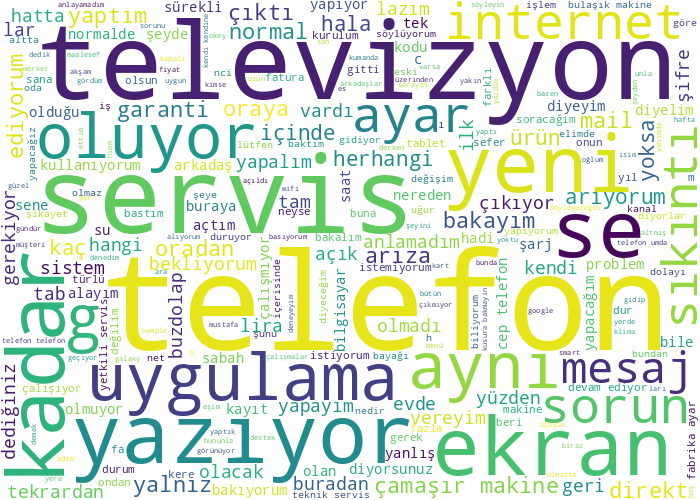

In [ ]:
# kelime bulutu en çok 250 kelime
long_string = ','.join(list(df['CustomerText'].values))
wordcloud = WordCloud(background_color="white", max_words=250, width=700, height=500, contour_width=10, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()


#model

In [ ]:
# BERT, embedding model'e ihtiyaç duyar. embedding model olarak bert base turkish kullanıldı
# Önceden eğitilmiş modeli BERT'te kullanmak için otomatik sınıflar kullanılarak ilk önce tokenize sonra model oluşturulur.
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-128k-cased")
model = AutoModel.from_pretrained("dbmdz/bert-base-turkish-128k-cased")

tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/386 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.18M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/740M [00:00<?, ?B/s]

# ilk yaptıklarıModel tanımlanır ve çalıştırılır.
topic_model = BERTopic(embedding_model=model, diversity=0.7,
                       language='turkish', nr_topics=14, n_gram_range=(1,2), verbose=True,
                       calculate_probabilities=True, seed_topic_list=[['ankastre','fırın','set üstü','davlumbaz','mikro dalga'],['bulaşık'],['buzdolap'],['telefon'],['süpürge'],['sinema sistem'],
                                                                                    ['fotoğraf makine'],['klima'],['monitör'],['bilgisayar'],['televizyon'],['yazıcı'],['çamaşır'],['tablet']])
topics, probs = topic_model.fit_transform(df.CustomerText)

In [ ]:
import numpy as np
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

In [ ]:

model_name = "dbmdz/bert-base-turkish-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)


seed_topic_list = [
    ['ankastre', 'fırın', 'set', 'üstü', 'davlumbaz', 'mikro', 'dalga'],
    ['bulaşık'],
    ['buzdolap'],
    ['telefon'],
    ['süpürge'],
    ['sinema', 'sistem'],
    ['fotoğraf', 'makine'],
    ['klima'],
    ['monitör'],
    ['bilgisayar'],
    ['televizyon'],
    ['yazıcı'],
    ['çamaşır'],
    ['tablet']
]

# BERTopic modelini oluşturma
topic_model = BERTopic(embedding_model=model, language='turkish', nr_topics=14, n_gram_range=(1, 2), verbose=True)

# Metinleri bert tabanlı embedings'e dönüştürme
embeddings = SentenceTransformer(model_name).encode(df.CustomerText.tolist(), show_progress_bar=True)

# Konu modelleme
topics, _ = topic_model.fit_transform(df.CustomerText.tolist(), embeddings)

# Belge başına olasılık hesaplama
probs = topic_model.transform(df.CustomerText.tolist())

# Embedings şekil doğrulama
print("Embeddings'in şekli:", embeddings.shape)
representative_docs = topic_model.get_representative_docs()
print("Her bir konu için temsili belgeler:", representative_docs)






tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/251k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Batches:   0%|          | 0/618 [00:00<?, ?it/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2024-07-01 16:17:21,985 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-07-01 16:18:05,110 - BERTopic - Dimensionality - Completed ✓
2024-07-01 16:18:05,112 - BERTopic - Cluster - Start clustering the reduced embeddings
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
2024-07-01 16:18:08,723 - BERTopic - Cluster - Completed ✓
2024-07-01 16:18:08,725 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-07-01 16:18:29,700 - BERTopic - Representation - Completed ✓
2024-07-01 16:18:29,819 - BERTopic - Topic reduction - Reducing number of topics
2024-07-01 16:18:29,822 - BERTopic - Topic reduction - Reduced number of topics from 10 to 10


Batches:   0%|          | 0/618 [00:00<?, ?it/s]

2024-07-01 16:19:31,189 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
2024-07-01 16:20:15,090 - BERTopic - Dimensionality - Completed ✓
2024-07-01 16:20:15,091 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-07-01 16:20:16,376 - BERTopic - Cluster - Completed ✓


Embeddings'in şekli: (19771, 768)
Her bir konu için temsili belgeler: {-1: ['   derdim gideceğim  memnun olduğum    n     telefon   telefon    servis        oğuz servis kendi  ulaşamadım    email mail  gayretli   bilmediğim  diyemiyorum tuşla yapmadım ünde bağlanamıyorum oraya  burasını  istedim     olmuş olsa elimdeki    elimde   teknik servis    olmadığı  bağlanamıyorum oradaki    kişiye kişilere bağlanamıyorum   cem elmas   anne öğrenmek istedim  gizem  işinizi alayım durumuma  öğrenmek istedim   eşim oraya servis parayı yatırdım  sistem düşmüş     telefon  elime         herhangi  eren   özür dilerim  değilim herhangi  vermedim  aldığım telefon  üstüne kayıtlı  turkcell olduğu   demediler herhangi  ver ver v yapmaya  ur    iptal  ilk   kere  uğraşmaya  kalktığımız download zorunda       oraya bastı buraya bas oraya bas buraya   tıklamaya yaptırdılar rehbere     bulaştığıma    ulaşamazsanız  eşimin     ulaşamazsanız verdi telefon  mailleri   telefon yapılır yeğen   ücret çık yalnız z

# model sonuçları

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,92,-1_telefon_ayar_aynı_servis,"[telefon, ayar, aynı, servis, televizyon, uygu...",[ derdim gideceğim memnun olduğum n ...
1,0,35,0____,"[, , , , , , , , , ]","[ , , ]"
2,1,13,1_lütfen hattan_hattan_hattan ayrılmayınız_ayr...,"[lütfen hattan, hattan, hattan ayrılmayınız, a...",[ kişi başkası görüşüyor lütfen hattan ayrıl...
3,2,19166,2_telefon_servis_televizyon_ayar,"[telefon, servis, televizyon, ayar, garanti, e...",[ ev telefon servis vermiştim kargoyla gö...
4,3,11,3_ayar_kanal_türksat_televizyon,"[ayar, kanal, türksat, televizyon, windows, ba...",[ dünden beri kanal sinyal problemi vardı...
5,4,42,4_telefon_servis_televizyon_ayar,"[telefon, servis, televizyon, ayar, aynı, inte...",[ televizyon tuz serisi televizyon tele...
6,5,225,5_telefon_servis_kadar_arıza,"[telefon, servis, kadar, arıza, lira, garanti,...",[duygu alkaya cumartesi günü gold cumar...
7,6,19,6_kanal_ayar_televizyon_uydu,"[kanal, ayar, televizyon, uydu, türksat, anten...",[ tablet alçı yaşıyorum türlü silemedim ...
8,7,56,7_televizyon_internet_ayar_uygulama,"[televizyon, internet, ayar, uygulama, smart, ...",[ türksat televizyon türlü açamıyoruz mehm...
9,8,112,8_telefon_uygulama_ayar_google,"[telefon, uygulama, ayar, google, şifre, ekran...",[emre yardımcı olabilirsiniz galaksi inç...


In [ ]:
# 14 adet konu ve konuda geçen ilk 10 anahtar kelimesi
for i in range(14):
    print([i+1],'. konu: ',topic_model.get_topic(i) ,'\n')

[1] . konu:  [('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05)] 

[2] . konu:  [('telefon', 0.020637056398809386), ('ayar', 0.016082336156704877), ('televizyon', 0.015430260950338644), ('servis', 0.013931078108763057), ('aynı', 0.010606646212649912), ('kanal', 0.010385678529470782), ('ekran', 0.009101844723634784), ('internet', 0.009048210085856916), ('kadar', 0.008507024169785887), ('ses', 0.007982419056137472)] 

[3] . konu:  [('lütfen hattan', 0.5332603257234425), ('hattan', 0.46570539318301185), ('hattan ayrılmayınız', 0.45606335878004606), ('ayrılmayınız', 0.45606335878004606), ('lütfen', 0.3353834431204044), ('kişi başkası', 0.29114274640531174), ('başkası', 0.27455680909777824), ('başkası görüşüyor', 0.26763439365916547), ('kişi', 0.26684073668381897), ('görüşüyor', 0.2540010612727844)] 

[4] . konu:  [('telefon', 0.023221265393810555), ('servis', 0.016598596095724318), ('televizyon', 0.0158268626846

In [ ]:
topic_model.visualize_topics()

In [ ]:
# çıkan konular ve konulara ait ilk 5 kelimenin olasılıklarının çubuk grafiklerler gösterimi
topic_model.visualize_barchart(top_n_topics=99)

#model değerlendirme

## C_v (14 adet konu için)

In [ ]:
# çıkan konular ve konulara ait ilk 5 kelimenin olasılıklarının çubuk grafiklerler gösterimi
topic_model.visualize_barchart(top_n_topics=99)

documents = pd.DataFrame({"Document": df.CustomerText,
                          "ID": range(len(df.CustomerText)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]


# tutarlılığı ölçmek (0 ile 1 arası skor / skorun 1'e yakın olması daha iyidir.)
# C_v: Normalleştirilmiş noktasal karşılıklı bilgi (NPMI) ve kosinüs benzerliğini kullanan dolaylı bir doğrulama ölçüsüne dayanır.
# Kayan pencere algoritmasına dayanır. En iyi kelimelerin tek kümeli segmentasyonu, her en iyi kelime vektörü ile tüm en iyi kelime vektörlerinin toplamı arasındaki benzerliğin hesaplanmasını sağlar.
# Benzerlik ölçüsü olarak kosinüs kullanılır. Tutarlılık, bu benzerliklerin aritmetik ortalamasıdır.
topic_words = [[words for words, _ in topic_model.get_topic(topic)]  # Remove the condition that filters out empty strings
               for topic in range(topic_model.get_topic_info().shape[0])]  # Iterate over all topics including -1

topic_words = [[words for words, _ in topic_model.get_topic(topic) if words]  # Filter out empty strings
               for topic in range(topic_model.get_topic_info().shape[0])]  # Iterate over all topics including -1

cv_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
cv_bert = cv_model.get_coherence()
print('\nTutarlılık skoru: ', cv_bert)

In [ ]:
#CHATGBT
import pandas as pd
from gensim import corpora
from gensim.models import CoherenceModel

# Verilerin hazırlanması
documents = pd.DataFrame({"Document": df.CustomerText,
                          "ID": range(len(df.CustomerText)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

# Tutarlılığı ölçmek için Coherence Model hazırlığı
topic_words = []
for topic in range(len(topic_model.get_topics())):
    words, _ = zip(*topic_model.get_topic(topic))
    topic_words.append([word for word in words])

# Coherence Model'i oluşturma
cv_model = CoherenceModel(topics=topic_words,
                          texts=tokens,
                          corpus=corpus,
                          dictionary=dictionary,
                          coherence='c_v')
cv_bert = cv_model.get_coherence()

print('\nTutarlılık skoru: ', cv_bert)



## NPMI (14 adet konu için)

In [ ]:
# NPMI metriği, UCI'ın PMI yerine NPMI kullanılarak geliştirilmiş bir tutarlılık ölçüsüdür.
# 1 ile 1 arasında sürekli bir değerdir. 1'e yaklaştıkça birlikte oluşumu gösterir.
# 0'a yakınsa bağımsızlığı gösterir.
npmi_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_npmi')
npmi_bert = npmi_model.get_coherence()
print('\nTutarlılık skoru: ', npmi_bert)

## Topic Diversity (14 adet konu için)

In [ ]:
# Konu çeşitliliği açısından değerlendirmek için aşağıdaki kod yazılıyor.

import numpy as np
from rbo import rbo
from scipy.spatial import distance
from itertools import combinations
from word_embeddings_rbo import word_embeddings_rbo

def proportion_unique_words(topics, topk=10):
    """
    compute the proportion of unique words

    Parameters
    ----------
    topics: a list of lists of words
    topk: top k words on which the topic diversity will be computed
    """
    if topk > len(topics[0]):
        raise Exception('Words in topics are less than '+str(topk))
    else:
        unique_words = set()
        for topic in topics:
            unique_words = unique_words.union(set(topic[:topk]))
        puw = len(unique_words) / (topk * len(topics))
        return puw


def irbo(topics, weight=0.9, topk=10):
    """
    compute the inverted rank-biased overlap

    Parameters
    ----------
    topics: a list of lists of words
    weight: p (float), default 1.0: Weight of each
        agreement at depth d:p**(d-1). When set
        to 1.0, there is no weight, the rbo returns
        to average overlap.
    topk: top k words on which the topic diversity
          will be computed

    Returns
    -------
    irbo : score of the rank biased overlap over the topics
    """
    if topk > len(topics[0]):
        raise Exception('Words in topics are less than topk')
    else:
        collect = []
        for list1, list2 in combinations(topics, 2):
            word2index = get_word2index(list1, list2)
            indexed_list1 = [word2index[word] for word in list1]
            indexed_list2 = [word2index[word] for word in list2]
            rbo_val = rbo(indexed_list1[:topk], indexed_list2[:topk], p=weight)[2]
            collect.append(rbo_val)
        return 1 - np.mean(collect)


def word_embedding_irbo(topics, word_embedding_model, weight=0.9, topk=10):
    '''
    compute the word embedding-based inverted rank-biased overlap

    Parameters
    ----------
    topics: a list of lists of words
    weight: p (float), default 1.0: Weight of each agreement at depth d:
    p**(d-1). When set to 1.0, there is no weight, the rbo returns to average overlap.

    Returns
    -------
    weirbo: word embedding-based inverted rank_biased_overlap over the topics
    '''
    if topk > len(topics[0]):
        raise Exception('Words in topics are less than topk')
    else:
        collect = []
        for list1, list2 in combinations(topics, 2):
            word2index = get_word2index(list1, list2)
            index2word = {v: k for k, v in word2index.items()}
            indexed_list1 = [word2index[word] for word in list1]
            indexed_list2 = [word2index[word] for word in list2]
            rbo_val = word_embeddings_rbo(indexed_list1[:topk], indexed_list2[:topk], p=weight,
                                          index2word=index2word, word2vec=word_embedding_model)[2]
            collect.append(rbo_val)
        return 1 - np.mean(collect)


def pairwise_jaccard_diversity(topics, topk=10):
    '''
    compute the average pairwise jaccard distance between the topics

    Parameters
    ----------
    topics: a list of lists of words
    topk: top k words on which the topic diversity
          will be computed

    Returns
    -------
    pjd: average pairwise jaccard distance
    '''
    dist = 0
    count = 0
    for list1, list2 in combinations(topics, 2):
        js = 1 - len(set(list1).intersection(set(list2)))/len(set(list1).union(set(list2)))
        dist = dist + js
        count = count + 1
    return dist/count


def pairwise_word_embedding_distance(topics, word_embedding_model, topk=10):
    """
    :param topk: how many most likely words to consider in the evaluation
    :return: topic coherence computed on the word embeddings similarities
    """
    if topk > len(topics[0]):
        raise Exception('Words in topics are less than topk')
    else:
        count = 0
        sum_dist = 0
        for list1, list2 in combinations(topics, 2):
            count = count+1
            word_counts = 0
            dist = 0
            for word1 in list1[:topk]:
                for word2 in list2[:topk]:
                    dist = dist + distance.cosine(word_embedding_model.wv[word1], word_embedding_model.wv[word2])
                    word_counts = word_counts + 1

            dist = dist/word_counts
            sum_dist = sum_dist + dist
        return sum_dist/count


def centroid_distance(topics, word_embedding_model, topk=10):
    """
    :param topk: how many most likely words to consider in the evaluation
    :return: topic coherence computed on the word embeddings similarities
    """
    if topk > len(topics[0]):
        raise Exception('Words in topics are less than topk')
    else:
        count = 0
        for list1, list2 in combinations(topics, 2):
            count = count + 1
            centroid1 = np.zeros(word_embedding_model.vector_size)
            centroid2 = np.zeros(word_embedding_model.vector_size)
            for word1 in list1[:topk]:
                centroid1 = centroid1 + word_embedding_model[word1]
            for word2 in list2[:topk]:
                centroid2 = centroid2 + word_embedding_model[word2]
            centroid1 = centroid1 / len(list1[:topk])
            centroid2 = centroid2 / len(list2[:topk])
        return distance.cosine(centroid1, centroid2)


def get_word2index(list1, list2):
    words = set(list1)
    words = words.union(set(list2))
    word2index = {w: i for i, w in enumerate(words)}
    return word2index


"""Rank-biased overlap, a ragged sorted list similarity measure.
See http://doi.acm.org/10.1145/1852102.1852106 for details. All functions
directly corresponding to concepts from the paper are named so that they can be
clearly cross-identified.
The definition of overlap has been modified to account for ties. Without this,
results for lists with tied items were being inflated. The modification itself
is not mentioned in the paper but seems to be reasonable, see function
``overlap()``. Places in the code which diverge from the spec in the paper
because of this are highlighted with comments.
The two main functions for performing an RBO analysis are ``rbo()`` and
``rbo_dict()``; see their respective docstrings for how to use them.
The following doctest just checks that equivalent specifications of a
problem yield the same result using both functions:
    >>> lst1 = [{"c", "a"}, "b", "d"]
    >>> lst2 = ["a", {"c", "b"}, "d"]
    >>> ans_rbo = _round(rbo(lst1, lst2, p=.9))
    >>> dct1 = dict(a=1, b=2, c=1, d=3)
    >>> dct2 = dict(a=1, b=2, c=2, d=3)
    >>> ans_rbo_dict = _round(rbo_dict(dct1, dct2, p=.9, sort_ascending=True))
    >>> ans_rbo == ans_rbo_dict
    True
"""

from __future__ import division

import math
from bisect import bisect_left
from collections import namedtuple


RBO = namedtuple("RBO", "min res ext")
RBO.__doc__ += ": Result of full RBO analysis"
RBO.min.__doc__ = "Lower bound estimate"
RBO.res.__doc__ = "Residual corresponding to min; min + res is an upper bound estimate"
RBO.ext.__doc__ = "Extrapolated point estimate"


def _round(obj):
    if isinstance(obj, RBO):
        return RBO(_round(obj.min), _round(obj.res), _round(obj.ext))
    else:
        return round(obj, 3)


def set_at_depth(lst, depth):
    ans = set()
    for v in lst[:depth]:
        if isinstance(v, set):
            ans.update(v)
        else:
            ans.add(v)
    return ans


def raw_overlap(list1, list2, depth):
    """Overlap as defined in the article.
    """
    set1, set2 = set_at_depth(list1, depth), set_at_depth(list2, depth)
    return len(set1.intersection(set2)), len(set1), len(set2)


def overlap(list1, list2, depth):
    """Overlap which accounts for possible ties.
    This isn't mentioned in the paper but should be used in the ``rbo*()``
    functions below, otherwise overlap at a given depth might be > depth which
    inflates the result.
    There are no guidelines in the paper as to what's a good way to calculate
    this, but a good guess is agreement scaled by the minimum between the
    requested depth and the lengths of the considered lists (overlap shouldn't
    be larger than the number of ranks in the shorter list, otherwise results
    are conspicuously wrong when the lists are of unequal lengths -- rbo_ext is
    not between rbo_min and rbo_min + rbo_res.
    >>> overlap("abcd", "abcd", 3)
    3.0
    >>> overlap("abcd", "abcd", 5)
    4.0
    >>> overlap(["a", {"b", "c"}, "d"], ["a", {"b", "c"}, "d"], 2)
    2.0
    >>> overlap(["a", {"b", "c"}, "d"], ["a", {"b", "c"}, "d"], 3)
    3.0
    """
    ov = agreement(list1, list2, depth) * min(depth, len(list1), len(list2))
    return ov
    # NOTE: comment the preceding and uncomment the following line if you want
    # to stick to the algorithm as defined by the paper
    # return raw_overlap(list1, list2, depth)[0]


def agreement(list1, list2, depth):
    """Proportion of shared values between two sorted lists at given depth.
    >>> _round(agreement("abcde", "abdcf", 1))
    1.0
    >>> _round(agreement("abcde", "abdcf", 3))
    0.667
    >>> _round(agreement("abcde", "abdcf", 4))
    1.0
    >>> _round(agreement("abcde", "abdcf", 5))
    0.8
    >>> _round(agreement([{1, 2}, 3], [1, {2, 3}], 1))
    0.667
    >>> _round(agreement([{1, 2}, 3], [1, {2, 3}], 2))
    1.0
    """
    len_intersection, len_set1, len_set2 = raw_overlap(list1, list2, depth)
    return 2 * len_intersection / (len_set1 + len_set2)


def cumulative_agreement(list1, list2, depth):
    return (agreement(list1, list2, d) for d in range(1, depth + 1))


def average_overlap(list1, list2, depth=None):
    """Calculate average overlap between ``list1`` and ``list2``.
    >>> _round(average_overlap("abcdefg", "zcavwxy", 1))
    0.0
    >>> _round(average_overlap("abcdefg", "zcavwxy", 2))
    0.0
    >>> _round(average_overlap("abcdefg", "zcavwxy", 3))
    0.222
    >>> _round(average_overlap("abcdefg", "zcavwxy", 4))
    0.292
    >>> _round(average_overlap("abcdefg", "zcavwxy", 5))
    0.313
    >>> _round(average_overlap("abcdefg", "zcavwxy", 6))
    0.317
    >>> _round(average_overlap("abcdefg", "zcavwxy", 7))
    0.312
    """
    depth = min(len(list1), len(list2)) if depth is None else depth
    return sum(cumulative_agreement(list1, list2, depth)) / depth


def rbo_at_k(list1, list2, p, depth=None):
    # ``p**d`` here instead of ``p**(d - 1)`` because enumerate starts at
    # 0
    depth = min(len(list1), len(list2)) if depth is None else depth
    d_a = enumerate(cumulative_agreement(list1, list2, depth))
    return (1 - p) * sum(p ** d * a for (d, a) in d_a)


def rbo_min(list1, list2, p, depth=None):
    """Tight lower bound on RBO.
    See equation (11) in paper.
    >>> _round(rbo_min("abcdefg", "abcdefg", .9))
    0.767
    >>> _round(rbo_min("abcdefgh", "abcdefg", .9))
    0.767
    """
    depth = min(len(list1), len(list2)) if depth is None else depth
    x_k = overlap(list1, list2, depth)
    log_term = x_k * math.log(1 - p)
    sum_term = sum(
        p ** d / d * (overlap(list1, list2, d) - x_k) for d in range(1, depth + 1)
    )
    return (1 - p) / p * (sum_term - log_term)


def rbo_res(list1, list2, p):
    """Upper bound on residual overlap beyond evaluated depth.
    See equation (30) in paper.
    NOTE: The doctests weren't verified against manual computations but seem
    plausible. In particular, for identical lists, ``rbo_min()`` and
    ``rbo_res()`` should add up to 1, which is the case.
    >>> _round(rbo_res("abcdefg", "abcdefg", .9))
    0.233
    >>> _round(rbo_res("abcdefg", "abcdefghijklmnopqrstuvwxyz", .9))
    0.239
    """
    S, L = sorted((list1, list2), key=len)
    s, l = len(S), len(L)
    x_l = overlap(list1, list2, l)
    # since overlap(...) can be fractional in the general case of ties and f
    # must be an integer --> math.ceil()
    f = int(math.ceil(l + s - x_l))
    # upper bound of range() is non-inclusive, therefore + 1 is needed
    term1 = s * sum(p ** d / d for d in range(s + 1, f + 1))
    term2 = l * sum(p ** d / d for d in range(l + 1, f + 1))
    term3 = x_l * (math.log(1 / (1 - p)) - sum(p ** d / d for d in range(1, f + 1)))
    return p ** s + p ** l - p ** f - (1 - p) / p * (term1 + term2 + term3)


def rbo_ext(list1, list2, p):
    """RBO point estimate based on extrapolating observed overlap.
    See equation (32) in paper.
    NOTE: The doctests weren't verified against manual computations but seem
    plausible.
    >>> _round(rbo_ext("abcdefg", "abcdefg", .9))
    1.0
    >>> _round(rbo_ext("abcdefg", "bacdefg", .9))
    0.9
    """
    S, L = sorted((list1, list2), key=len)
    s, l = len(S), len(L)
    x_l = overlap(list1, list2, l)
    x_s = overlap(list1, list2, s)
    # the paper says overlap(..., d) / d, but it should be replaced by
    # agreement(..., d) defined as per equation (28) so that ties are handled
    # properly (otherwise values > 1 will be returned)
    # sum1 = sum(p**d * overlap(list1, list2, d)[0] / d for d in range(1, l + 1))
    sum1 = sum(p ** d * agreement(list1, list2, d) for d in range(1, l + 1))
    sum2 = sum(p ** d * x_s * (d - s) / s / d for d in range(s + 1, l + 1))
    term1 = (1 - p) / p * (sum1 + sum2)
    term2 = p ** l * ((x_l - x_s) / l + x_s / s)
    return term1 + term2


def rbo(list1, list2, p):
    """Complete RBO analysis (lower bound, residual, point estimate).
    ``list`` arguments should be already correctly sorted iterables and each
    item should either be an atomic value or a set of values tied for that
    rank. ``p`` is the probability of looking for overlap at rank k + 1 after
    having examined rank k.
    >>> lst1 = [{"c", "a"}, "b", "d"]
    >>> lst2 = ["a", {"c", "b"}, "d"]
    >>> _round(rbo(lst1, lst2, p=.9))
    RBO(min=0.489, res=0.477, ext=0.967)
    """
    if not 0 <= p <= 1:
        raise ValueError("The ``p`` parameter must be between 0 and 1.")
    args = (list1, list2, p)
    return RBO(rbo_min(*args), rbo_res(*args), rbo_ext(*args))


def sort_dict(dct, *, ascending=False):
    """Sort keys in ``dct`` according to their corresponding values.
    Sorts in descending order by default, because the values are
    typically scores, i.e. the higher the better. Specify
    ``ascending=True`` if the values are ranks, or some sort of score
    where lower values are better.
    Ties are handled by creating sets of tied keys at the given position
    in the sorted list.
    >>> dct = dict(a=1, b=2, c=1, d=3)
    >>> list(sort_dict(dct)) == ['d', 'b', {'a', 'c'}]
    True
    >>> list(sort_dict(dct, ascending=True)) == [{'a', 'c'}, 'b', 'd']
    True
    """
    scores = []
    items = []
    # items should be unique, scores don't have to
    for item, score in dct.items():
        if not ascending:
            score *= -1
        i = bisect_left(scores, score)
        if i == len(scores):
            scores.append(score)
            items.append(item)
        elif scores[i] == score:
            existing_item = items[i]
            if isinstance(existing_item, set):
                existing_item.add(item)
            else:
                items[i] = {existing_item, item}
        else:
            scores.insert(i, score)
            items.insert(i, item)
    return items


def rbo_dict(dict1, dict2, p, *, sort_ascending=False):
    """Wrapper around ``rbo()`` for dict input.
    Each dict maps items to be sorted to the score according to which
    they should be sorted. The RBO analysis is then performed on the
    resulting sorted lists.
    The sort is descending by default, because scores are typically the
    higher the better, but this can be overridden by specifying
    ``sort_ascending=True``.
    >>> dct1 = dict(a=1, b=2, c=1, d=3)
    >>> dct2 = dict(a=1, b=2, c=2, d=3)
    >>> _round(rbo_dict(dct1, dct2, p=.9, sort_ascending=True))
    RBO(min=0.489, res=0.477, ext=0.967)
    """
    list1, list2 = (
        sort_dict(dict1, ascending=sort_ascending),
        sort_dict(dict2, ascending=sort_ascending),
    )
    return rbo(list1, list2, p)


if __name__ in ("__main__", "__console__"):
    import doctest

    doctest.testmod()


from __future__ import division

import math
from bisect import bisect_left
from collections import namedtuple
from collections import OrderedDict

RBO = namedtuple("RBO", "min res ext")
RBO.__doc__ += ": Result of full RBO analysis"
RBO.min.__doc__ = "Lower bound estimate"
RBO.res.__doc__ = "Residual corresponding to min; min + res is an upper bound estimate"
RBO.ext.__doc__ = "Extrapolated point estimate"

def _round(obj):
    if isinstance(obj, RBO):
        return RBO(_round(obj.min), _round(obj.res), _round(obj.ext))
    else:
        return round(obj, 3)


def set_at_depth(lst, depth):
    ans = set()
    for v in lst[:depth]:
        if isinstance(v, set):
            ans.update(v)
        else:
            ans.add(v)
    return ans


def embeddings_overlap(list1, list2, depth, index2word, word2vec):
    #set1, set2 = set_at_depth(list1, depth), set_at_depth(list2, depth)
    #return len(set1.intersection(set2)), len(set1), len(set2)

    set1, set2 = set_at_depth(list1, depth), set_at_depth(list2, depth)
    word_list1 = [index2word[index] for index in list1]
    word_list2 = [index2word[index] for index in list2]

    similarities = {}
    for w1 in word_list1[:depth]:
        for w2 in word_list2[:depth]:
            similarities[(w1,w2)] = word2vec.similarity(w1, w2)

    similarities = OrderedDict(sorted(similarities.items(), key=lambda x: -x[1]))

    e_ov = 0
    key_list = list(similarities.keys())
    for k in key_list:
        if k in similarities.keys():
            #print(k, similarities[k])
            e_ov = e_ov + similarities[k]
            similarities = {save_k: v for save_k, v in similarities.items()
                            if save_k[0] != k[0] and save_k[1] != k[1]}
    #e_ov = 1
    #print("****")
    return e_ov, len(set1), len(set2)


def overlap(list1, list2, depth, index2word, word2vec):
    #return agreement(list1, list2, depth) * min(depth, len(list1), len(list2))
    # NOTE: comment the preceding and uncomment the following line if you want
    # to stick to the algorithm as defined by the paper
    ov = embeddings_overlap(list1, list2, depth, index2word, word2vec)[0]
    return ov


def agreement(list1, list2, depth, index2word, word2vec):
    """Proportion of shared values between two sorted lists at given depth."""
    len_intersection, len_set1, len_set2 = embeddings_overlap(list1, list2, depth, index2word, word2vec)
    return 2 * len_intersection / (len_set1 + len_set2)


def cumulative_agreement(list1, list2, depth, index2word, word2vec):
    return (agreement(list1, list2, d, index2word, word2vec) for d in range(1, depth + 1))


def average_overlap(list1, list2, index2word, word2vec, depth=None):
    """Calculate average overlap between ``list1`` and ``list2``.
    """
    depth = min(len(list1), len(list2)) if depth is None else depth
    return sum(cumulative_agreement(list1, list2, depth, index2word=index2word, word2vec=word2vec)) / depth


def rbo_at_k(list1, list2, p, index2word, word2vec, depth=None):
    # ``p**d`` here instead of ``p**(d - 1)`` because enumerate starts at
    # 0
    depth = min(len(list1), len(list2)) if depth is None else depth
    d_a = enumerate(cumulative_agreement(list1, list2, depth, index2word=index2word, word2vec=word2vec))
    return (1 - p) * sum(p ** d * a for (d, a) in d_a)


def rbo_min(list1, list2, p, index2word, word2vec, depth=None):
    """Tight lower bound on RBO.
    See equation (11) in paper.
    """
    depth = min(len(list1), len(list2)) if depth is None else depth
    x_k = overlap(list1, list2, depth, index2word, word2vec)
    log_term = x_k * math.log(1 - p)
    sum_term = sum(
        p ** d / d * (overlap(list1, list2, d, index2word, word2vec=word2vec) - x_k) for d in range(1, depth + 1)
    )
    return (1 - p) / p * (sum_term - log_term)


def rbo_res(list1, list2, p, index2word, word2vec):
    """Upper bound on residual overlap beyond evaluated depth.
    See equation (30) in paper.
    NOTE: The doctests weren't verified against manual computations but seem
    plausible. In particular, for identical lists, ``rbo_min()`` and
    ``rbo_res()`` should add up to 1, which is the case.
    """
    S, L = sorted((list1, list2), key=len)
    s, l = len(S), len(L)
    x_l = overlap(list1, list2, l, index2word, word2vec)
    # since overlap(...) can be fractional in the general case of ties and f
    # must be an integer --> math.ceil()
    f = int(math.ceil(l + s - x_l))
    # upper bound of range() is non-inclusive, therefore + 1 is needed
    term1 = s * sum(p ** d / d for d in range(s + 1, f + 1))
    term2 = l * sum(p ** d / d for d in range(l + 1, f + 1))
    term3 = x_l * (math.log(1 / (1 - p)) - sum(p ** d / d for d in range(1, f + 1)))
    return p ** s + p ** l - p ** f - (1 - p) / p * (term1 + term2 + term3)


def rbo_ext(list1, list2, p, index2word, word2vec):
    """RBO point estimate based on extrapolating observed overlap.
    See equation (32) in paper.
    NOTE: The doctests weren't verified against manual computations but seem
    plausible.
    >>> _round(rbo_ext("abcdefg", "abcdefg", .9))
    1.0
    >>> _round(rbo_ext("abcdefg", "bacdefg", .9))
    0.9
    """
    S, L = sorted((list1, list2), key=len)
    s, l = len(S), len(L)
    x_l = overlap(list1, list2, l, index2word, word2vec)
    x_s = overlap(list1, list2, s, index2word, word2vec)
    # the paper says overlap(..., d) / d, but it should be replaced by
    # agreement(..., d) defined as per equation (28) so that ties are handled
    # properly (otherwise values > 1 will be returned)
    # sum1 = sum(p**d * overlap(list1, list2, d)[0] / d for d in range(1, l + 1))
    sum1 = sum(p ** d * agreement(list1, list2, d, index2word=index2word, word2vec=word2vec)
               for d in range(1, l + 1))
    sum2 = sum(p ** d * x_s * (d - s) / s / d for d in range(s + 1, l + 1))
    term1 = (1 - p) / p * (sum1 + sum2)
    term2 = p ** l * ((x_l - x_s) / l + x_s / s)
    return term1 + term2


def word_embeddings_rbo(list1, list2, p, index2word, word2vec):
    """Complete RBO analysis (lower bound, residual, point estimate).
    ``list`` arguments should be already correctly sorted iterables and each
    item should either be an atomic value or a set of values tied for that
    rank. ``p`` is the probability of looking for overlap at rank k + 1 after
    having examined rank k.
    >>> lst1 = [{"c", "a"}, "b", "d"]
    >>> lst2 = ["a", {"c", "b"}, "d"]
    >>> _round(rbo(lst1, lst2, p=.9))
    RBO(min=0.489, res=0.477, ext=0.967)
    """
    if not 0 <= p <= 1:
        raise ValueError("The ``p`` parameter must be between 0 and 1.")
    args = (list1, list2, p, index2word, word2vec)

    return RBO(rbo_min(*args), rbo_res(*args), rbo_ext(*args))


def sort_dict(dct, *, ascending=False):
    """Sort keys in ``dct`` according to their corresponding values.
    Sorts in descending order by default, because the values are
    typically scores, i.e. the higher the better. Specify
    ``ascending=True`` if the values are ranks, or some sort of score
    where lower values are better.
    Ties are handled by creating sets of tied keys at the given position
    in the sorted list.
    >>> dct = dict(a=1, b=2, c=1, d=3)
    >>> list(sort_dict(dct)) == ['d', 'b', {'a', 'c'}]
    True
    >>> list(sort_dict(dct, ascending=True)) == [{'a', 'c'}, 'b', 'd']
    True
    """
    scores = []
    items = []
    # items should be unique, scores don't have to
    for item, score in dct.items():
        if not ascending:
            score *= -1
        i = bisect_left(scores, score)
        if i == len(scores):
            scores.append(score)
            items.append(item)
        elif scores[i] == score:
            existing_item = items[i]
            if isinstance(existing_item, set):
                existing_item.add(item)
            else:
                items[i] = {existing_item, item}
        else:
            scores.insert(i, score)
            items.insert(i, item)
    return items


def rbo_dict(dict1, dict2, p, index2word, word2vec, *, sort_ascending=False):
    """Wrapper around ``rbo()`` for dict input.
    Each dict maps items to be sorted to the score according to which
    they should be sorted. The RBO analysis is then performed on the
    resulting sorted lists.
    The sort is descending by default, because scores are typically the
    higher the better, but this can be overridden by specifying
    ``sort_ascending=True``.
    """
    list1, list2 = (
        sort_dict(dict1, ascending=sort_ascending),
        sort_dict(dict2, ascending=sort_ascending),
    )
    return word_embeddings_rbo(list1, list2, p, index2word, word2vec)


In [ ]:
from diversity_metrics import *

from gensim.test.utils import datapath
from gensim.models import KeyedVectors

In [ ]:
word_list1 =['internet','servis','telefon', 'kanal', 'uydu','smart', 'sıkıntı', 'görüntü','destek','garanti']
word_list2= ['ekran', 'servis', 'cep','mesaj','telefon arıza','es', 'gerekiyor','bilgi','telefon birim','makine']
word_list3 =['telefon','ekran', 'ses','uygulama','geri','sıkıntı','sorun','mail','cep','ediyorum']
word_list4= ['servis','buzdolap','klima','ses','lira','yeni','sorun','ediyorum','içinde','çamaşır makine']
word_list5 =['inç','kurulum','montaj','duvara','ediyorum','umuz','almak','bilgi','garanti','televizyon']
word_list6= ['servis','çamaşır makine','buzdolap','ediyorum','kaç','saat','garanti','bekliyorum','içinde','evde']
word_list7 =['ses','servis','nereden','buzdolap','klima','ederiz','eşiyim','çamaşır makine','olun','sağ']
word_list8= ['çamaşır makine','ses','garanti','program','problem','suyu','bubble','kilo','devam','ediyorum']
word_list9 =['telefon','galaxy','uygulama','servis','garanti','sıkıntı','cep','normal','kaç','oraya']
word_list10= ['şarj','galaxy tab','vardı','uygulama','ediyorum','oluyor','ses','internet','geri','ekran']
word_list11=['telefon','imei','ses','ediyorum','gmail','şifre','hala','yaptım','kom','mail adresi']
word_list12= ['telefon','ekran','uygulama','ses','garanti','sorun','kendi','sıkıntı','istiyorum','bilemiyorum']
word_list13 =['youtube','telefon','uygulama','güncelleme','sorun','şifre','çıkıyor','destek','normal','kodu']
word_list14= ['buzdolap','servis','motor garanti','klima','evde','sene','soğutmuyor','elektrik','çamaşır makine','devam']

topics = [word_list1, word_list2, word_list3, word_list4, word_list5, word_list6, word_list7, word_list8, word_list9, word_list10, word_list11, word_list12,
          word_list13, word_list14]

In [ ]:
print("puw:",proportion_unique_words(topics, topk=10)) # Benzersiz kelimelerin oranı(puw)
print("jd:", pairwise_jaccard_diversity(topics, topk=10)) # ortalama İkili Jaccard Mesafesi(jd)
print("irbo p=0.5:",irbo(topics, weight=0.5, topk=10)) # Ters Sıra Önyargılı Örtüşme(irbo) ağırlık=0,5
print("irbo p=0.9:",irbo(topics, weight=0.9, topk=10)) # Ters Sıra Önyargılı Örtüşme(irbo) ağırlık=0,9

## Konu sayısına göre değerlendirmeler

In [ ]:
# konu sayısı değiştikçe skor da değişmektedir bu sebeple konu sayısının değişmesiyle skorun değişmesini gözlemlenir ve en iyi konu saysına karar verilir.
import time
def compute_coherence_values(dictionary, topics, corpus, texts, limit, start, step):

    start_time = time.perf_counter()
    cv_values = []
    cnpmi_values=[]
    time_vals=[]
    model2_list = []

    for nr_topics in range(start, limit, step):
        model2 = BERTopic(embedding_model=model, diversity=0.7,
                       language='multilingual', nr_topics=nr_topics, n_gram_range=(1,2), verbose=True,
                       calculate_probabilities=True, seed_topic_list=[['ankastre','fırın','set üstü','davlumbaz','mikro dalga'],['bulaşık'],['buzdolap'],['telefon'],['süpürge'],['sinema sistem'],
                                                                                    ['fotoğraf makine'],['klima'],['monitör'],['bilgisayar'],['televizyon'],['yazıcı'],['çamaşır'],['tablet']])
        model2_list.append(model2)
        topics, probs = model2.fit_transform(df.CustomerText)

        cleaned_docs = model2._preprocess_text(documents_per_topic.Document.values)

        vectorizer = model2.vectorizer_model
        analyzer = vectorizer.build_analyzer()

        words = vectorizer.get_feature_names()
        tokens = [analyzer(doc) for doc in cleaned_docs]
        dictionary = corpora.Dictionary(tokens)
        corpus = [dictionary.doc2bow(token) for token in tokens]
        topic_words = [[words for words, _ in model2.get_topic(topic)]
                    for topic in range(len(set(topics))-1)]

        cv_model2 = CoherenceModel(topics=topic_words, texts=tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
        cnpmi_model2 =CoherenceModel(topics=topic_words, texts=tokens, corpus=corpus, dictionary=dictionary, coherence='c_npmi')


        end_time = time.perf_counter()

        cv_values.append(cv_model2.get_coherence())
        cnpmi_values.append(cnpmi_model2.get_coherence())
        time_vals.append((end_time-start_time)/60)

    return model2_list, cv_values, cnpmi_values, time_vals

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

x = range(5, 20, 3)
model2_list, cv_values, cnpmi_values, time_vals= compute_coherence_values(dictionary=dictionary, topics= topic_words, corpus=corpus, texts=tokens,
                                                                         start=5, limit=20, step=3)

NameError: name 'dictionary' is not defined

In [ ]:
timeee=[]
timeee.append(time_vals[0])
for i in range(0,4):
    sure=time_vals[i+1]-time_vals[i]
    timeee.append(sure)

sonuc_df = pd.DataFrame(data = {'Konu sayısı': x, 'c_v skoru(0,1)': cv_values, 'NPMI skoru(-1,1)': cnpmi_values, 'Süre(dakika)': timeee})
sonuc_df

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

start=5; limit=20; step=3;
x = range(start, limit, step)
plt.plot(x, cv_values, 'o-')
plt.xlabel("Number of topics")
plt.ylabel("c_v coherence score(0,1)")
plt.title('Higher is better')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

start=5; limit=20; step=3;
x = range(start, limit, step)
plt.plot(x, cnpmi_values, 'o-')
plt.xlabel("Number of topics")
plt.ylabel("NPMI score(-1,1)")
plt.title('Higher is better')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

start=5; limit=20; step=3;
x = range(start, limit, step)
plt.plot(x, timeee, 'o-')
plt.xlabel("Number of topics")
plt.ylabel("Time(min)")
plt.title('Lower is better')
plt.show()

# Yeni Bölüm

In [ ]:
topics_seri = pd.Series(topics)

# veriseti oluşturulur.
df_konular = pd.DataFrame({'konu': topics, 'yazi': df.CustomerText})

import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Assume df_konular is your DataFrame with 'yazi' and 'konu' columns
# Tokenize the texts
tokenizer = Tokenizer(num_words=100000)  # Adjust num_words as needed
tokenizer.fit_on_texts(df_konular['yazi'])
X = tokenizer.texts_to_sequences(df_konular['yazi'])

# One-hot encode the labels
Y = pd.get_dummies(df_konular['konu']).values

# Pad sequences to ensure consistent input shape
max_tokens = 100  # Example max_tokens, adjust as per your requirements
X_pad = pad_sequences(X, maxlen=max_tokens)

# Resample the data to balance the classes
rus = RandomOverSampler(random_state=0, sampling_strategy="minority")
X_resampled, Y_resampled = rus.fit_resample(X_pad, Y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.25, random_state=42

In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer # Metinleri makinenin anlayacağı dile çevirmek için vektörlere çevirmeliyiz. Bu yüzden bir ham doküman koleksiyonunu TF-IDF özelliklerinin bir matrisine dönüştürmek için TfidfVectorizer kullanılır.
# TF: Term Frequency=terim frekansı: bir dokümanda belirli bir terimden kaç tane olduğunu bulur. / IDF: Inverse Document Frequency=Ters doküman frekansı: belirli terimin kaç farklı dokümanda geçtiğini hesaplar.
# Tf-idf ise belirli terimin kaç farklı dokümanda kaç kere geçtiğine önem verir. Bu yüzden tf-idf kullanıldı.
from sklearn.model_selection import train_test_split # Veriyi eğitim ve test diye ayırmak için modül
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir
from sklearn.metrics import accuracy_score # doğruluk skoru hesaplamak için yüklenir.

dataDoc = df_konular['yazi'].values.tolist() # Metin verileri girdi olarak seçilir.
dataClass = df_konular['konu'].values.tolist() # konu verileri çıktı olarak seçilir.

# Tfidf skorlama yöntemini kullanarak veriyi sayısallaştırmadan önce eğitim ve test olarak veriyi ayırıyoruz.
x_train, x_test, y_train, y_test = train_test_split(dataDoc, dataClass, test_size = 0.25, random_state = 42)

#tfidf işlemi
tfidf_vectorizer = TfidfVectorizer(min_df=3) # min_df: Nadiren görünen terimleri göz ardı etmek için kullanılır. Şu anda bir terim 3 dokümandan az geçiyorsa göz ardı edilecek.

# metin verileri makinenin anlayacağı dile vektörlere dönüştürülür.
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.linear_model import LogisticRegression # Lojistik regresyon kullanmak için yüklenir.
#lr = LogisticRegression(solver='sag', random_state=18,multi_class='multinomial', max_iter=782) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lr= LogisticRegression(
                max_iter=66,
                C=0.4,
                penalty='none',
                class_weight=None,
                dual=False,
                fit_intercept=True,
                n_jobs=-1,
                random_state=15,
                solver='saga',
                tol=1e-3
                )
lr_clf = lr.fit(x_train, y_train) # model eğitilir.
pred_test_lr = lr_clf.predict(x_test) # tahmin yapılır


end = datetime.now()
print(end-start)
print("****Bitti****")

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lr = lr_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lr)))

# Test skoru
print('Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lr)))
print('Lojistik Regresyon Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lr, average='weighted')))





from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lr)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

accuracy = accuracy_score(y_test,pred_test_lr)
precision = precision_score(y_test,pred_test_lr, average='weighted')
recall = recall_score(y_test,pred_test_lr, average='weighted')
f1 = f1_score(y_test,pred_test_lr, average='weighted')

print(f"loj Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Yeni Bölüm

## 14 ana konu için sınıflandırma algoritmaları

In [ ]:
# yeni veriseti oluşturup sınıflandırma yapılır. Bunun için konu modellemenin çıkarttığı konular(topics) seriye dönüştürülür.
topics_seri = pd.Series(topics)
topics_seri

0        3
1        3
2        3
3        3
4        3
        ..
19766    3
19767    3
19768    3
19769    3
19770    3
Length: 19771, dtype: int64

In [ ]:
df.CustomerText

0           kampanyaya ılırım başarıyla  uçlandırmak te...
1              kaldım     saat derecede evde       sırf...
2            cuma günü   üstte gürbüz lira abimiz arıza...
3           faruk   klima  gece ilk çalıştırdım  yapıla...
4          çalışmalar ceylan        televizyon   yeni  ...
                               ...                        
19766    barış  barış      yıllar    arıyorum talep    ...
19767       telefon garanti oraya kayıtımın almışlardı ...
19768          işler  yorum    durumum vardı  media mar...
19769      merkezinden şikayet  açıp ocak terbiyesiz ya...
19770         cep telefon vardı  babam kullanıyor götür...
Name: CustomerText, Length: 19771, dtype: object

In [ ]:
# veriseti oluşturulur.
df_konular = pd.DataFrame({'konu': topics, 'yazi': df.CustomerText})
df_konular

,konu,yazi
0,3,kampanyaya ılırım başarıyla uçlandırmak te...
1,3,kaldım saat derecede evde sırf...
2,3,cuma günü üstte gürbüz lira abimiz arıza...
3,3,faruk klima gece ilk çalıştırdım yapıla...
4,3,çalışmalar ceylan televizyon yeni ...
...,...,...
19766,3,barış barış yıllar arıyorum talep ...
19767,3,telefon garanti oraya kayıtımın almışlardı ...
19768,3,işler yorum durumum vardı media mar...
19769,3,merkezinden şikayet açıp ocak terbiyesiz ya...


In [ ]:
from keras.preprocessing.text import Tokenizer # Makinenin yazıyı anlayabilmesi için Tokenizer ile veri setinde kullanılan en çok 100000 kelime ile bir sözlük oluşturulur.
import numpy as np # Matematiksel işlemler için gerekli numpy kütüphanesi

tokenizer = Tokenizer(num_words=100000) # sözlük oluşturulur.
tokenizer.fit_on_texts(df_konular['yazi']) # yazılar tokene dönüştürülür.

# toplam token sayısı
num_tokens = [len(tokens) for tokens in df_konular['yazi']]
num_tokens = np.array(num_tokens)

# max token sayısı
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

# Sinir ağımız bizden girdileri eşit boyutta istiyor. Gerçek hayattaki problemlerde bu çok zordur. Bu yüzden verileri aynı boyuta getirmek için pad_sequences kullanılır.
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df_konular['yazi']) # cümleleri sözlükteki kelimelerin karşılığına çevrilir.
Y = pd.get_dummies(df_konular['konu']).values # çıktı verilerimiz anlayacağı hale getirdik.
X_pad = pad_sequences(X, maxlen=max_tokens) # pad_sequences ile aynı boyuta getirilir. uzunluk olarak da önceden hesapladığımız cümle boyutu max_tokens koydum.

# verimiz dengesiz olduğu için RandomOverSampler ile verimizi yeniden örnekliyoruz.
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(random_state = 0, sampling_strategy = "minority") # RandomUnderSampler parametreleri belirlenerek değişkene atanır. sampling_strategy, örnekleme stratejisi, minority olarak belirlendi. Çünkü verilerimiz dengesiz olduğu için azınlıkları(minority) yeniden örnekleyerek veriyi dengelemeye çalışıyoruz.
x_rus, y_rus = rus.fit_resample(X_pad, Y) # veriler yeniden örneklendirilir.
print(x_rus.shape, y_rus.shape)

from sklearn.model_selection import train_test_split # verileri eğitim ve test diye bölünür.
x_train, x_test, y_train, y_test = train_test_split(X_pad, Y, test_size = 0.25, random_state = 42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(38931, 2652) (38931, 8)
(14828, 2652) (14828, 8)
(4943, 2652) (4943, 8)


In [ ]:
from tensorflow import keras # yapay sinir ağı kullanmak için keras yüklenir.
from math import exp
import matplotlib.pyplot as plt

model_ker = keras.Sequential() # Bir sıralı(Sequential) model, tek girdi ve tek çıktı katmanın olduğu derin öğrenme modeli oluşturmaya yarar.
model_ker.add(keras.layers.Embedding(100000, 100, input_length=max_tokens)) # yazıyı vektörlere çevirir. Tanımı: Pozitif tamsayı (indeksleri) sabit boyutta yoğun vektörlere dönüştürür.
model_ker.add(keras.layers.LSTM(100, dropout=0.5, recurrent_dropout=0.5))
model_ker.add(keras.layers.Dense(7, activation='softmax')) # çıktı katmanı. SoftMAX aktivasyon fonksiyonu, göreceli olasılıkları hesaplar. çoklu sınıf olduğu için softmax kullanılır. ağın son katmanı için aktivasyon olarak kullanılır, çünkü sonuç bir olasılık dağılımı olarak yorumlanabilir. softmanx kullanılmasının sebebi modelin multi-class ve bir doğru cevabın olmasındandır.

model_ker.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # çok sınıflı sınıflandırma problemi olduğu için categorical_crossentropy kullanıldı.

epochs = 5 # Algoritmasının tüm eğitim veri kümesinde kaç kere çalışacağını belirtir.
batch_size = 512 # batch, bir veya daha fazla örnek üzerinde yineleme yapan ve tahminlerde bulunan için bir döngü sayısıdır. her örnekten sonra tahminler beklenen çıktılarla karşılaştırılır ve bir hata hesaplanır. hataya göre tahmini iyileştirmeye çalışır.

callback = (keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001))# model çalıştırılır(validation loss'u gözle eğer 3 epochdur(devirdir) en az 0.0001 gelişmiyorsa eğitimi durdur.)

history = model_ker.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=[x_test,y_test],callbacks=[callback]) # model çalıştırılır

# modelimizin test verileri doğruluğu
accr = model_ker.evaluate(x_test, y_test)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 8) and (None, 7) are incompatible


In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer # Metinleri makinenin anlayacağı dile çevirmek için vektörlere çevirmeliyiz. Bu yüzden bir ham doküman koleksiyonunu TF-IDF özelliklerinin bir matrisine dönüştürmek için TfidfVectorizer kullanılır.
# TF: Term Frequency=terim frekansı: bir dokümanda belirli bir terimden kaç tane olduğunu bulur. / IDF: Inverse Document Frequency=Ters doküman frekansı: belirli terimin kaç farklı dokümanda geçtiğini hesaplar.
# Tf-idf ise belirli terimin kaç farklı dokümanda kaç kere geçtiğine önem verir. Bu yüzden tf-idf kullanıldı.
from sklearn.model_selection import train_test_split # Veriyi eğitim ve test diye ayırmak için modül
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir
from sklearn.metrics import accuracy_score # doğruluk skoru hesaplamak için yüklenir.

In [ ]:
dataDoc = df_konular['yazi'].values.tolist() # Metin verileri girdi olarak seçilir.
dataClass = df_konular['konu'].values.tolist() # konu verileri çıktı olarak seçilir.

# Tfidf skorlama yöntemini kullanarak veriyi sayısallaştırmadan önce eğitim ve test olarak veriyi ayırıyoruz.
x_train, x_test, y_train, y_test = train_test_split(dataDoc, dataClass, test_size = 0.25, random_state = 42)

#tfidf işlemi
tfidf_vectorizer = TfidfVectorizer(min_df=3) # min_df: Nadiren görünen terimleri göz ardı etmek için kullanılır. Şu anda bir terim 3 dokümandan az geçiyorsa göz ardı edilecek.

# metin verileri makinenin anlayacağı dile vektörlere dönüştürülür.
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)


In [ ]:
from sklearn.linear_model import SGDClassifier # Lojistik regresyon kullanmak için yüklenir.
lrsgd = SGDClassifier(loss="log", max_iter=1000, alpha=0.0001, random_state=42) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lrsgd_clf = lrsgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsgd = lrsgd_clf.predict(x_test_tfidf) # tahmin yapılır

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsgd = lrsgd_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('SGD''li Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsgd)))

# Test skoru
print('SGD''li Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsgd)))

In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.linear_model import LogisticRegression # Lojistik regresyon kullanmak için yüklenir.
lr = LogisticRegression(solver='saga', random_state=42,multi_class='multinomial', max_iter=1000) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lr_clf = lr.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lr = lr_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lr = lr_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lr)))

# Test skoru
print('Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lr)))
print('Lojistik Regresyon Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lr, average='weighted')))

In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lr, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

In [ ]:
from datetime import datetime
start = datetime.now()

import lightgbm as lgbm # lightgbm kullanmak için yüklenir.

# lightgbm modeli tanımlanır.
clf_LGBM = lgbm.LGBMClassifier(min_data_in_leaf=10,feature_fraction=0.5, learning_rate=0.01, random_state=42, max_depth=3, num_leaves=7, objective='multiclass')
# learning_rate=0.01> öğrenme adım sayısını doğruluğu artırmak adına düşürdüm.
# overfitting düşürmek için min_data_in_leaf kullandım. Böylece her yaprakta bulunacak minimum veriyi çoğaltarak bir yaprağın çok spesifik hale gelmesini engelledim.
# overfitting düşürmek için feature_fraction kullandım. Böylece her iterasyonda rastgele seçilecek özniteliklerin oranı belirlendi.

clf_LGBM.fit(x_train_tfidf, y_train) # model eğitilir.

pred_test_LGBM = clf_LGBM.predict(x_test_tfidf) # Tahmin yapılır.

end = datetime.now()
print(end-start)
print("****Bitti****")


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.

print(metrics.classification_report(y_true = y_test, y_pred=pred_test_LGBM, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

In [ ]:
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_LGBM = clf_LGBM.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.


print('LightGBM Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_LGBM)))

# Test skoru
print('LightGBM Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_LGBM)))
print('lightgbm Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_LGBM, average='weighted')))

In [ ]:
from sklearn import svm

clf_sgd = SGDClassifier(loss="hinge", alpha=0.001, random_state=42) # sgd optimizasyonu ile lineer kernel SVC
# alpha, iki amaca hizmet eder. Hem C gibi bir düzenleme parametresi hem de varsayılan zamanlama kapsamındaki ilk öğrenme oranıdır(learning_rate).
# hinge loss, sınıflandırma sınırından kayıp hesaplamasında mesafeyi içeren belirli bir kayıp fonksiyonudur. SVM'de kullanılır.
clf_sgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svcsgd = clf_sgd.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svcsgd = clf_sgd.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svcsgd eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svcsgd)))

# Test skoru
print('svcsgd Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svcsgd)))

In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svcsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

In [ ]:
clf_lin = svm.SVC(kernel='linear', C=0.9, decision_function_shape='ovo', random_state=42) # lineer kernel SVC
# C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
clf_lin.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svclin = clf_lin.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svclin = clf_lin.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svclin eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svclin)))

# Test skoru
print('svclin Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svclin)))

In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svclin, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.svm import LinearSVC # Libsvm kütüphanesi yerine Liblinear kütüphanesini kullanır. Daha esnektir.
lrsvc = LinearSVC(C=0.2, random_state=42) # C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
lrsvc_clf = lrsvc.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsvc = lrsvc_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsvc = lrsvc_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('lineer svc Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsvc)))

# Test skoru
print('lineer svc Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsvc)))
print('lineer svc Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lrsvc, average='weighted')))

In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsvc, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.